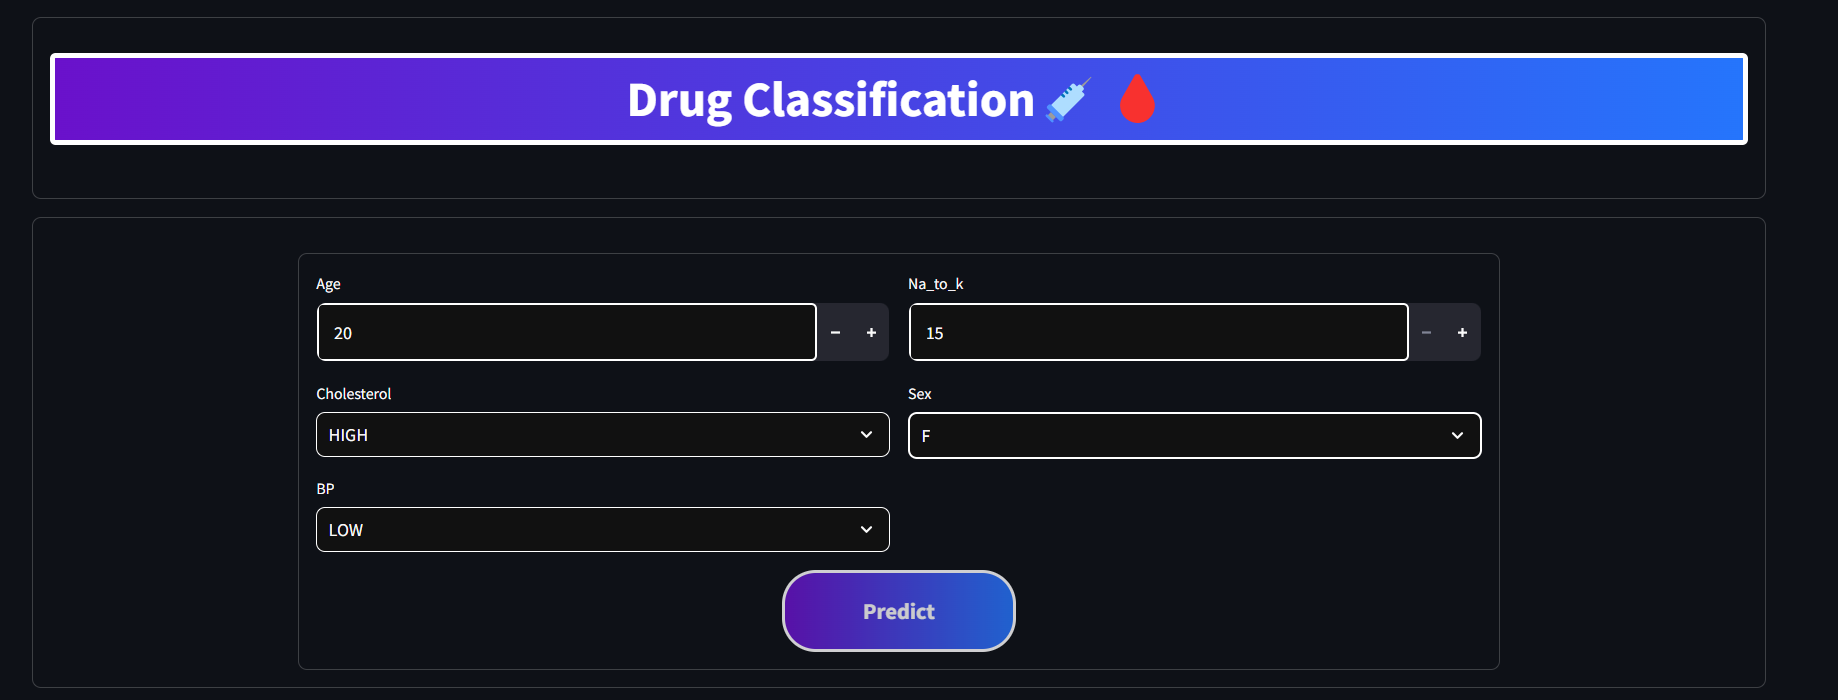

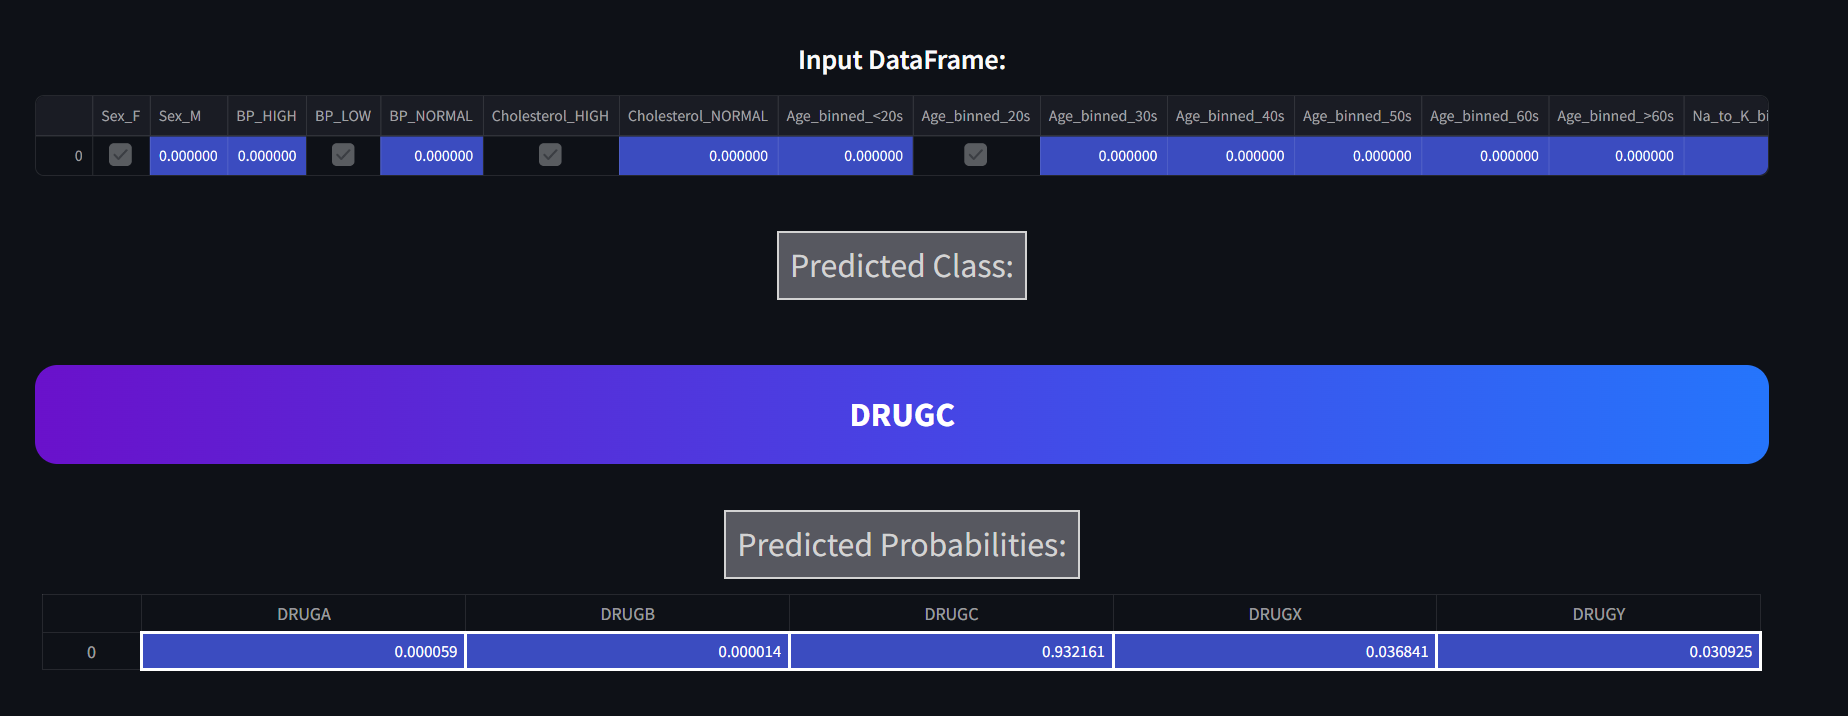

## Drug Classificatoin ML Project: https://www.kaggle.com/code/abdallahprogrammer/drug-classification-ml-project 

In [ ]:
# Importing ToolKits
import re
from time import sleep
import pandas as pd
import numpy as np
import streamlit as st
from streamlit.components.v1 import html
import warnings
import os
os.chdir(path=r"C:\Users\acer\Downloads")
def run():
    st.set_page_config(
        page_title="Drug Classification",
        page_icon="💉🩸",
        layout="wide"
    )
    warnings.simplefilter(action='ignore', category=FutureWarning)
    # Function To Load Our Dataset
    @st.cache_data
    def load_model(model_path):
        return pd.read_pickle(model_path)

    model = pd.read_pickle("ML2.pkl")

    st.markdown(
        """
    <style>
         .center {
            display: flex;
            justify-content: center;
            align-items: center;    
        }
         .main {
            text-align: center;
         }
         h3{
            font-size: 25px
         }   
         .st-emotion-cache-16txtl3 h1 {
         font: bold 29px arial;
         text-align: center;
         margin-bottom: 15px

         }
         div[data-testid=stSidebarContent] {
         background-color: #111;
         border-right: 4px solid white;
         padding: 8px!important

         }

         div.block-containers{
            padding-top: 0.7rem
         }

         .st-emotion-cache-z5fcl4{
            padding-top: 5rem;
            padding-bottom: 1rem;
            padding-left: 1.1rem;
            padding-right: 2.2rem;
            overflow-x: hidden;
         }

         .st-emotion-cache-16txtl3{
            padding: 2.7rem 0.6rem
         }

         .plot-container.plotly{
            border: 1px solid white;
            border-radius: 6px;
         }

         div.st-emotion-cache-1r6slb0 span.st-emotion-cache-10trblm{
            font: bold 24px tahoma
         }
         div [data-testid=stImage]{
            text-align: center;
            display: block;
            margin-left: auto;
            margin-right: auto;
            width: 100%;
        }

        div[data-baseweb=select]>div{
            cursor: pointer;
            background-color: #111;
            border: 1px solid white;
        }
        div[data-baseweb=select]>div:hover{
            border: 4px solid white

        }
        div[data-baseweb=base-input]{
            background-color: #111;
            border: 2px solid white;
            border-radius: 5px;
            padding: 5px
        }

        div[data-testid=stFormSubmitButton]> button{
            width: 20%;
            background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%);
            border: 3px solid white;
            padding: 18px;
            border-radius: 30px;
            opacity: 0.8;
        }
        div[data-testid=stFormSubmitButton]  p{
            font-weight: bold;
            font-size : 20px
        }

        div[data-testid=stFormSubmitButton]> button:hover{
            opacity: 3;
            border: 2px solid white;
            color: white
        }

    </style>
    """,
        unsafe_allow_html=True
    )
    header = st.container(border=True)
    content = st.container(border=True)
    st.write("")
    with header:
# Define the CSS styles for the h1 text
        css = """
        h1 {
            color: white;
            background-image: linear-gradient(to right, #6a11cb 0%, #2575fc 100%);
            padding: 10px; /* Add padding for better visibility */
            border-radius: 5px; /* Optional: Add border-radius for rounded corners */
            border: 5px solid white; /* Add white border */
        }
        """
        # Apply the custom CSS styles and display the h1 text
        # Apply the custom CSS styles
        st.markdown(f'<style>{css}</style>', unsafe_allow_html=True)
        # Display the title using Markdown with custom CSS
        st.markdown("<h1>Drug Classification💉🩸</h1>", unsafe_allow_html=True)
        #st.markdown("Drug Classification💉🩸")
        st.write("")
        st.write("")
        st.write("")
        
    
    with content:
        colu0,col1, col2 = st.columns([1,5,1])
        with col1:
            st.markdown('<div class="center">', unsafe_allow_html=True)
            with st.form("Preidct"):
                c1, c2 = st.columns(2)
                with c1:
                    age = st.number_input('Age', min_value=1,
                                          max_value=100, value=48)
                    Cholesterol = st.selectbox('Cholesterol', options=["HIGH", "NORMAL"], index=0)
                
                    BP = st.selectbox('BP', options=[
                        "LOW", "NORMAL", "HIGH"], index=0)

                with c2:
                    Na_to_k = st.number_input('Na_to_k', min_value=15,
                                                     max_value=75, value=25)
                    Sex = st.selectbox('Sex', options=[
                        "M", "F"], index=0)
                
                predict_button = st.form_submit_button("Predict")
                # Given data
    if predict_button:
        bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
        category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
        Age = pd.cut([age], bins=bin_age, labels=category_age)[0]
        data = {'Age_binned': [Age]}
        df = pd.DataFrame(data)
        # Perform one-hot encoding
        df_encoded = pd.get_dummies(df, columns=['Age_binned'])
        # Display DataFrame
        #st.write("Input DataFrame:")
        #st.write(df_encoded)
        bin_NatoK = [0, 9, 19, 29, 50]
        category_NatoK = ['<10', '10-20', '20-30', '>30']
        Na_to_k2 = pd.cut([Na_to_k], bins=bin_NatoK, labels=category_NatoK)[0]
        data = {'Na_to_K_binned': [Na_to_k2]}
        df = pd.DataFrame(data)
        # Perform one-hot encoding
        df_encoded = pd.get_dummies(df, columns=['Na_to_K_binned'])
        # Display DataFrame
        #st.write("Input DataFrame:")
        #st.write(df_encoded)
        data = {
            'Sex': [Sex],  # Assuming 'F' as default, can be adjusted based on user input
            'BP': [BP],  # Assuming 'NORMAL' as default, can be adjusted based on user input
            'Cholesterol': [Cholesterol],  # Assuming 'NORMAL' as default, can be adjusted based on user input
            'Age_binned': [Age],
            'Na_to_K_binned': [Na_to_k2]
        }
        df = pd.DataFrame(data)

        # Perform one-hot encoding
        df_encoded = pd.get_dummies(df, columns=['Sex', 'BP', 'Cholesterol', 'Age_binned', 'Na_to_K_binned'])

        # Reorder columns to match the desired order
        desired_columns_order = [
            'Sex_F', 'Sex_M',
            'BP_HIGH', 'BP_LOW', 'BP_NORMAL',
            'Cholesterol_HIGH', 'Cholesterol_NORMAL',
            'Age_binned_<20s', 'Age_binned_20s', 'Age_binned_30s', 'Age_binned_40s', 'Age_binned_50s', 'Age_binned_60s', 'Age_binned_>60s',
            'Na_to_K_binned_<10', 'Na_to_K_binned_10-20', 'Na_to_K_binned_20-30', 'Na_to_K_binned_>30'
        ]
        df_encoded = df_encoded.reindex(columns=desired_columns_order)
        df_encoded.fillna(0, inplace=True)
        df_encoded_int = df_encoded.astype(int)
        # Display DataFrame
        st.subheader("Input DataFrame:")
        #st.write("Input DataFrame:")
        styler = df_encoded.style.background_gradient(cmap='coolwarm')

        # Customize the styler's CSS properties
        styler = styler.set_properties(**{
            'font-size': '16px',
            'color': 'white',
            'border': '2px solid white'
        })

        # Display the styled DataFrame
        st.write(styler)
        # st.write(df_encoded)
        data = df_encoded
        # Create a DataFrame
        df = pd.DataFrame(data)
        num = model.predict(df)
        # Display the predicted probabilities along with class labels
        st.write("")
        st.write("")
        markdown_text = '<spin style="color:lightgray;background:#575860;font-size:30px;border: 2px solid lightgray; padding: 10px;">Predicted Class:</spin>'
        # Display Markdown text
        st.markdown(markdown_text, unsafe_allow_html=True)
        st.header("")
        prediction = num
        def generate_gradient_css():
            css = """
            <style>
            .gradient-container {
                background: linear-gradient(to right, #6a11cb 0%, #2575fc 100%);
                padding: 20px;
                border-radius: 20px ;
                color: white;
                font-size: 30px;
                font-weight: bold;
                text-align: center;
                border-color: white;
            }
            </style>
            """
            return css
        prob = model.predict_proba(df)
        class_labels = model.classes_
        prob_df = pd.DataFrame(prob, columns=class_labels)
        #st.write(class_labels)
        st.markdown(generate_gradient_css(), unsafe_allow_html=True)
        st.markdown(f'<div class="gradient-container">{prediction[0].upper()}</div>', unsafe_allow_html=True)
        st.write("")
        st.write("")
        st.write("")
        #st.write("Predicted Probabilities:")
        markdown_text = '<spin style="color:lightgray;background:#575860;font-size:30px;border: 2px solid lightgray; padding: 10px;">Predicted Probabilities:</spin>'
        st.markdown(markdown_text,unsafe_allow_html=True)
        styler = prob_df.style.background_gradient(cmap='coolwarm')

        # Customize the styler's CSS properties
        styler = styler.set_properties(**{
            'font-size': '15px',
            'color': 'white',
            'border': '3px solid white'
            
        })
        # Display the styled DataFrame
        st.table(styler)
        st.markdown("""
    <style>
    th {
        text-align: center !important;
        text-transform: uppercase !important;

    }
    </style>
""", unsafe_allow_html=True)
        #st.write(prob)
        # frame = []
        # frame.append(age)
        # frame.append(Na_to_k)
        # frame.append(Sex)
        # frame.append(Cholesterol)
        # frame.append(BP)
        # df = pd.DataFrame(frame)
        # st.write(df)
run()